# Part 1 - Plotting isotope cross sections

Knowing the interaction probabilities of isotopes and materials in your model can help you understand simulation results. There are several online tools for plotting nuclear cross sections such as [www.xsplot.com](http://xsplot.com), however, OpenMC can also plot cross sections.

This python notebook allows users to plot neutron interaction cross sections for specific isotopes using OpenMC.

In this first part of the task we are plotting the <b>microscopic</b> cross-section "<b>σ</b>".

Microscopic cross section is the effective target area in $\mathrm{m}^2$ presented by a single nucleus to an incident neutron beam.

This is used to characterize the probability of reaction between a neutron and an individual nucleus.

Microscopic is often stated in units of barns where 1 barn is equal to $10^{−28}$ $\mathrm{m}^2$ 

In [ ]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/eBZ2lY_2v7IA", width=560, height=340)

There is no abundant natural source of tritium on Earth so DT fusion reactors will probably need to be self sufficient in tritium production.

Tritium is required as part of the fuel mix for deuterium (D)tritium (T) fusion reactors.

Tritium production is therefore one of the most important cross section in fusion.

To product sufficient tritium we need a high tritium production cross section.

Neutrons from DT fusion are created with around 14.1MeV of energy, which lithium isotope offers the highest probability of tritium production at that energy?

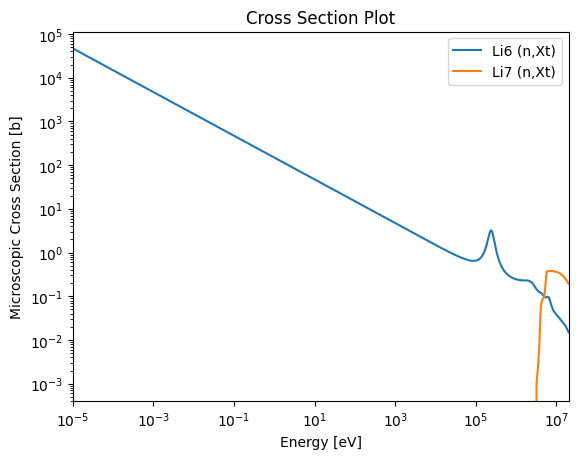

In [1]:
import openmc
import matplotlib.pyplot as plt

# setting the nuclear data path to the correct location in the docker image
openmc.config['cross_sections'] = '/nuclear_data/cross_sections.xml'

fig = openmc.plotter.plot_xs(
    reactions = {
        'Li6': ['(n,Xt)'],
        'Li7': ['(n,Xt)'],
    }
)
plt.show()

# Note the axis are log scale

Neutron multiplication is also an important reaction in fusion.

Neutron multiplying reactions increase the number of neutrons available for tritium producing reactions.

This next code block plots the neutron multiplication (n,2n) cross section of the Be and Pb isotopes.

Neutron multiplication is a threshold reaction meaning it only occurs at neutron energies above a certain threshold. You should notice that the threshold energies for Be9 and Pb204 are different.

Which isotope offers the lowest threshold and which isotopes offers the highest probability.

In [ ]:
# PB (lead) and Be (beryllium) are two candidate neutron multipliers with all their isotopes

# The (n,2n) reaction means one incident neutron and two neutrons produced

# we pass in a blank axis as we want to modify it afterwards
fig, ax = plt.subplots()

fig = openmc.plotter.plot_xs(
    axis=ax,
    reactions = {
        'Be9': ['(n,2n)'],
        'Pb204': ['(n,2n)'],
        'Pb206': ['(n,2n)'],
        'Pb207': ['(n,2n)'],
        'Pb208': ['(n,2n)'],
    }
)

# modify the axis afterwards to make the data clearer
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlim(0, 15e6)  # set the x axis limits from 0 to 15MeV

plt.show()

However, as well as neutron multiplication cross section, other neutronics factors to consider when selecting a multiplier could include:
- moderation power (how much they slow down the neutrons)
- amount of non useful reactions that don't multiply the neutrons (parasitic reactions)
- the transmutation products

**Learning Outcomes for Part 1:**
- OpenMC can be used to plot interaction cross sections for specific isotopes.
- Reaction probabilities vary for each isotope depending on the energy of the neutron.
- Li7 and Li6 both offer tritium producing reactions for different energy neutrons.
- Be and Pb perform well in terms of neutron multiplication. Be9 has the lowest threshold energy for neutron multiplication reactions.